In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

data = pd.read_csv('~/Desktop/python/Projects/p2/data/raw_data/Products_sales.csv')


In [9]:
#checking for null and duplicate values
#print(data.isnull().sum())
print(data.duplicated().sum())

1


In [12]:
print(data)

    Order ID  Order Date Customer ID     Product     Category  \
0     1001.0  01-01-2025        C001      Laptop  Electronics   
1     1002.0  02-01-2025        C002     Monitor  Electronics   
2     1003.0  03-01-2025        C003    Keyboard  Accessories   
3     1004.0  04-01-2025        C004       Mouse  Accessories   
4     1005.0  05-01-2025        C005  Smartphone  Electronics   
..       ...         ...         ...         ...          ...   
56    1057.0  26-02-2025        C057  Desk Chair    Furniture   
57    1058.0  27-02-2025        C058        Desk    Furniture   
58    1059.0  28-02-2025        C059  Headphones  Accessories   
59       NaN         NaN         NaN         NaN          NaN   
60       NaN         NaN         NaN         NaN          NaN   

    Quantity Ordered  Price Each   Sales  Unnamed: 8  
0                1.0      1000.0  1000.0         NaN  
1                2.0       200.0   400.0         NaN  
2                1.0        50.0    50.0         NaN  

In [14]:
#removing null column 
df = data.drop('Unnamed: 8', axis = 1)
print(df)

    Order ID  Order Date Customer ID     Product     Category  \
0     1001.0  01-01-2025        C001      Laptop  Electronics   
1     1002.0  02-01-2025        C002     Monitor  Electronics   
2     1003.0  03-01-2025        C003    Keyboard  Accessories   
3     1004.0  04-01-2025        C004       Mouse  Accessories   
4     1005.0  05-01-2025        C005  Smartphone  Electronics   
..       ...         ...         ...         ...          ...   
56    1057.0  26-02-2025        C057  Desk Chair    Furniture   
57    1058.0  27-02-2025        C058        Desk    Furniture   
58    1059.0  28-02-2025        C059  Headphones  Accessories   
59       NaN         NaN         NaN         NaN          NaN   
60       NaN         NaN         NaN         NaN          NaN   

    Quantity Ordered  Price Each   Sales  
0                1.0      1000.0  1000.0  
1                2.0       200.0   400.0  
2                1.0        50.0    50.0  
3                2.0        25.0    50.0  
4   

In [15]:
#removing null values
df = df.dropna()
print(df)

    Order ID  Order Date Customer ID     Product     Category  \
0     1001.0  01-01-2025        C001      Laptop  Electronics   
1     1002.0  02-01-2025        C002     Monitor  Electronics   
2     1003.0  03-01-2025        C003    Keyboard  Accessories   
3     1004.0  04-01-2025        C004       Mouse  Accessories   
4     1005.0  05-01-2025        C005  Smartphone  Electronics   
5     1006.0  06-01-2025        C006     Printer  Electronics   
6     1007.0  07-01-2025        C007  Desk Chair    Furniture   
7     1008.0  08-01-2025        C008        Desk    Furniture   
8     1009.0  09-01-2025        C009  Headphones  Accessories   
9     1010.0  10-01-2025        C010      Webcam  Accessories   
10    1011.0  11-01-2025        C011      Laptop  Electronics   
11    1012.0  12-01-2025        C012     Monitor  Electronics   
12    1013.0  13-01-2025        C013    Keyboard  Accessories   
13    1014.0  14-01-2025        C014       Mouse  Accessories   
14    1015.0  15-01-2025 

In [16]:
print(df.duplicated().sum())

0


In [17]:
#Checking duplicates in specific columns 
print("Duplicates in Order ID: ",df['Order ID'].duplicated().sum())
print("Duplicates in Order Date: ",df['Order Date'].duplicated().sum())
print("Duplicates in Customer ID: ",df['Customer ID'].duplicated().sum())

Duplicates in Order ID:  0
Duplicates in Order Date:  0
Duplicates in Customer ID:  0


In [18]:
print(df)

    Order ID  Order Date Customer ID     Product     Category  \
0     1001.0  01-01-2025        C001      Laptop  Electronics   
1     1002.0  02-01-2025        C002     Monitor  Electronics   
2     1003.0  03-01-2025        C003    Keyboard  Accessories   
3     1004.0  04-01-2025        C004       Mouse  Accessories   
4     1005.0  05-01-2025        C005  Smartphone  Electronics   
5     1006.0  06-01-2025        C006     Printer  Electronics   
6     1007.0  07-01-2025        C007  Desk Chair    Furniture   
7     1008.0  08-01-2025        C008        Desk    Furniture   
8     1009.0  09-01-2025        C009  Headphones  Accessories   
9     1010.0  10-01-2025        C010      Webcam  Accessories   
10    1011.0  11-01-2025        C011      Laptop  Electronics   
11    1012.0  12-01-2025        C012     Monitor  Electronics   
12    1013.0  13-01-2025        C013    Keyboard  Accessories   
13    1014.0  14-01-2025        C014       Mouse  Accessories   
14    1015.0  15-01-2025 

Exploratory Data Analysis (EDA)

In [24]:
#How many total orders are there?
Total_orders = df['Order ID'].nunique() #or use .count() if no duplicates
print("Total_orders: ", Total_orders)

Total_orders:  59


In [27]:
#What is the time range covered by the orders?

df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst = True,errors = 'coerce')

print(df['Order Date'].dtype)

Time_range = (df['Order Date'].min(),df['Order Date'].max())
print("Time Range: " ,Time_range)

datetime64[ns]
Time Range:  (Timestamp('2025-01-01 00:00:00'), Timestamp('2025-06-20 00:00:00'))


In [32]:
#How many unique customers are there?
Total_customers = df['Customer ID'].nunique()
print("Total Customers: ", Total_customers)

Total Customers:  59


In [33]:
#How many unique products and categories are sold?
Total_products = df['Product'].nunique()
print("Total Unique Products: ", Total_products)

Total_Categories = df['Category'].nunique()
print("Total Unique Categories: ", Total_Categories)

Total Unique Products:  10
Total Unique Categories:  3


In [40]:
#What is the total sales amount and total quantity ordered?
Total_sales_amount = df['Sales'].sum()
print("Total sales amount: ",Total_sales_amount)

Total_quantity_ordered = df['Quantity Ordered'].sum()
print("Total Quantity Ordered: ", Total_quantity_ordered)

Total sales amount:  27245.0
Total Quantity Ordered:  85.0


In [70]:
# Which product(s) generate the highest sales?
Highest_product_sold = df.groupby('Product')['Sales'].sum().sort_values(ascending = False).reset_index().reset_index()
print("Highest Product sold: \n",Highest_product_sold)

Highest Product sold: 
    index     Product   Sales
0      0     Monitor  7980.0
1      1  Smartphone  4580.0
2      2        Desk  3200.0
3      3      Laptop  2660.0
4      4  Headphones  1940.0
5      5     Printer  1930.0
6      6       Mouse  1885.0
7      7    Keyboard  1340.0
8      8      Webcam  1040.0
9      9  Desk Chair   690.0


In [86]:
#Which category has the highest total sales?
Highest_category_sold = df.groupby('Category')['Sales'].sum().sort_values(ascending = False)
print("Highest Category solf: \n",Highest_category_sold)

Highest Category solf: 
 Category
Electronics    17150.0
Accessories     6205.0
Furniture       3890.0
Name: Sales, dtype: float64


In [87]:
#What is the average sales per order?
average_sales = df.groupby('Order ID')['Sales'].sum().mean()
print("Average Sales per order: \n",average_sales)

Average Sales per order: 
 461.77966101694915


In [88]:
#Distribution of quantity ordered?
quantity_distribution = df['Quantity Ordered'].value_counts().sort_index()
print(quantity_distribution)


Quantity Ordered
1.0    49
2.0     5
3.0     2
5.0     1
7.0     1
8.0     1
Name: count, dtype: int64


C:\Users\HOME\AppData\Local\Temp\ipykernel_15980\3787882854.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=daily_sales, x='Order Date', y='Sales',palette = 'rocket')
C:\Users\HOME\AppData\Local\Temp\ipykernel_15980\3787882854.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


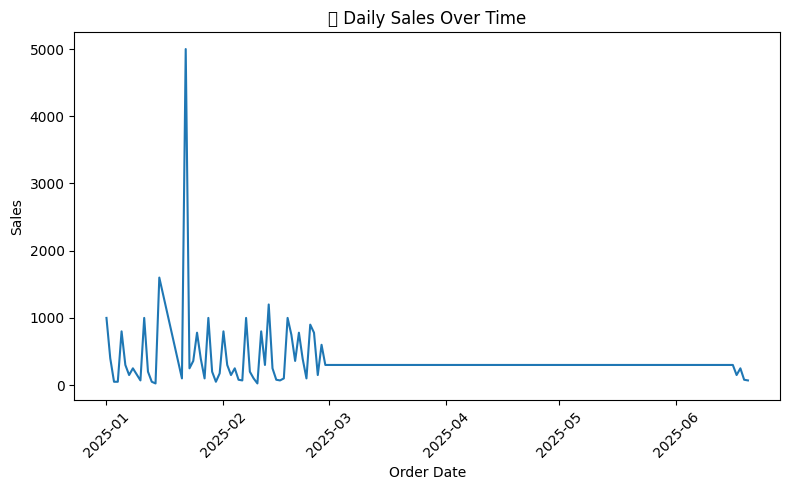

In [24]:
#Sales trends over time (daily)

daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.lineplot(data=daily_sales, x='Order Date', y='Sales',palette = 'rocket')

plt.title('📈 Daily Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


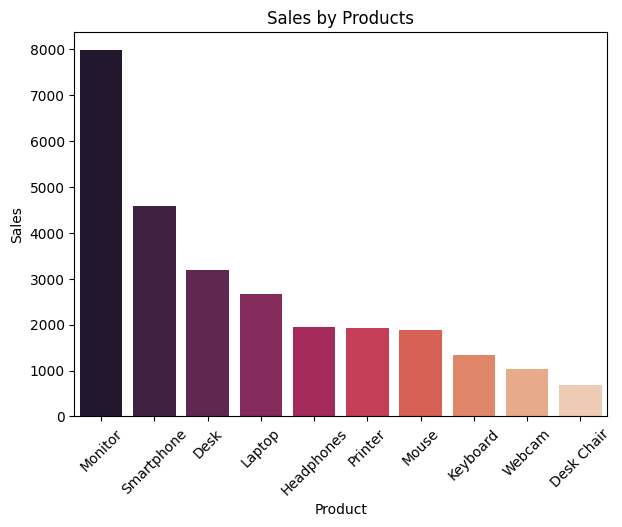

In [25]:
#Which products generate the highest revenue?
#Highest_product_sold = df.groupby('Product')['Sales'].sum().sort_values(ascending = False)

sns.barplot(data = Highest_product_sold, x = 'Product', y = 'Sales', hue = 'Product',palette = 'rocket')
plt.title('Sales by Products')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

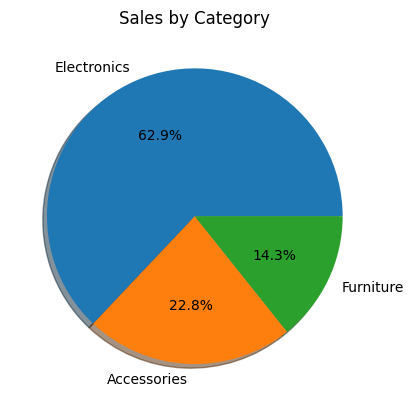

In [26]:
 #Sales by Category (Pie Chart)

plt.pie(Highest_category_sold,labels = Highest_category_sold.index, autopct = '%1.1f%%',shadow = True)
plt.title('Sales by Category')
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_15980\1302539856.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =weekday_sales.index , y = weekday_sales.values,palette = 'rocket')


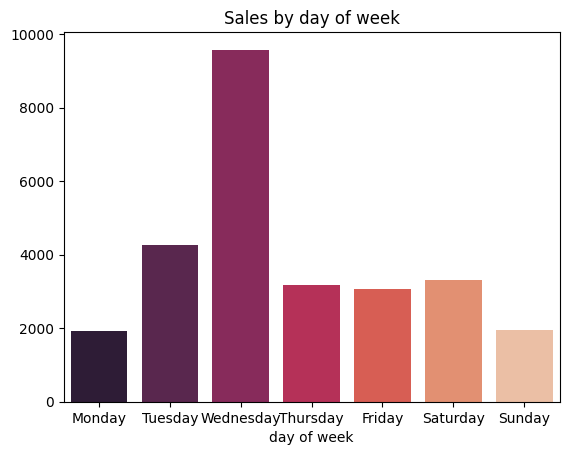

In [27]:
#Sales by Day of Week (Bar Plot)

df['day of week'] = df['Order Date'].dt.day_name()
weekday_sales = df.groupby('day of week')['Sales'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

sns.barplot(x =weekday_sales.index , y = weekday_sales.values,palette = 'rocket')
plt.title('Sales by day of week')
plt.show()

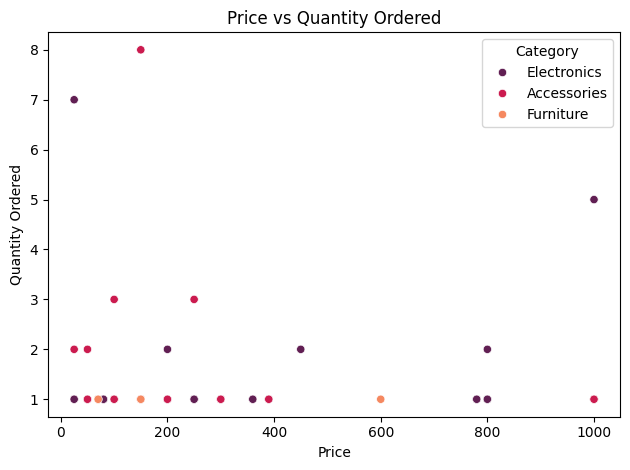

In [28]:
#Price vs Quantity Ordered (Scatter Plot)
#Is there any pattern between product price and quantity ordered?

sns.scatterplot(data = df, x = 'Price Each', y = 'Quantity Ordered', hue = 'Category', palette = 'rocket')
plt.title('Price vs Quantity Ordered')
plt.xlabel('Price')
plt.ylabel('Quantity Ordered')
plt.tight_layout()
plt.show()


In [29]:
print(df)

    Order ID Order Date Customer ID     Product     Category  \
0     1001.0 2025-01-01        C001      Laptop  Electronics   
1     1002.0 2025-01-02        C002     Monitor  Electronics   
2     1003.0 2025-01-03        C003    Keyboard  Accessories   
3     1004.0 2025-01-04        C004       Mouse  Accessories   
4     1005.0 2025-01-05        C005  Smartphone  Electronics   
5     1006.0 2025-01-06        C006     Printer  Electronics   
6     1007.0 2025-01-07        C007  Desk Chair    Furniture   
7     1008.0 2025-01-08        C008        Desk    Furniture   
8     1009.0 2025-01-09        C009  Headphones  Accessories   
9     1010.0 2025-01-10        C010      Webcam  Accessories   
10    1011.0 2025-01-11        C011      Laptop  Electronics   
11    1012.0 2025-01-12        C012     Monitor  Electronics   
12    1013.0 2025-01-13        C013    Keyboard  Accessories   
13    1014.0 2025-01-14        C014       Mouse  Accessories   
14    1015.0 2025-01-15        C015  Sma

In [30]:
df.to_csv('data/cleaned_sales_data.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'data'